## Importing necessary libraries

## Mounting Google Drive to import our data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
path = '/content/drive/MyDrive/data'
#train_datagen = ImageDataGenerator(rescale = 1/255)

In [ ]:
img_width = 256
img_height = 256
image_size = (img_width, img_height)
train_datagen = ImageDataGenerator(
        rotation_range=15,
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True)

train = train_datagen.flow_from_directory(batch_size=305,
                                                     directory=path,
                                                     target_size=image_size,
                                                     class_mode=None,
                                          save_to_dir="/content/drive/MyDrive/data/flower",
    save_prefix="",
    save_format='jpg',)

Found 2063 images belonging to 1 classes.


In [ ]:
len(train[2])

233

## Image Pre-processing

In [ ]:
train = train_datagen.flow_from_directory(path, target_size=(256, 256),class_mode=None,batch_size=305)

Found 2063 images belonging to 1 classes.


### Normalization of image

In [ ]:
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
import numpy as np
X =[]
Y =[]
for i in range(len(train)):
  for img in train[i]:
    try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0])
      Y.append(lab[:,:,1:] / 128)
    except:
      print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,))
print(X.shape)
print(Y.shape)

(2063, 256, 256, 1)
(2063, 256, 256, 2)


In [ ]:
X.shape

(843, 256, 256, 1)

## Model

In [ ]:
import tensorflow.keras.layers as layers
import keras
model = keras.Sequential([
    #Encoding the data
    layers.Input(shape=(256,256,1)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same', strides=2),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Conv2D(128, (3,3), activation='relu', padding='same', strides=2),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.Conv2D(256, (3,3), activation='relu', padding='same', strides=2),
    layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),

    #Decoding the data
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.Conv2D(16, (3,3), activation='relu', padding='same'),
    layers.Conv2D(2, (3, 3), activation='tanh', padding='same'),
    layers.UpSampling2D((2, 2))
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 512)       2

### Fitting the model

In [ ]:
model.compile(optimizer='adamax', loss='mse' , metrics=['accuracy'])
model.fit(X,Y,validation_split=0.2, epochs=500)


Epoch 1/500
52/52 [==============================] - 51s 322ms/step - loss: 0.0520 - accuracy: 0.6490 - val_loss: 0.0385 - val_accuracy: 0.6493
Epoch 2/500
52/52 [==============================] - 16s 318ms/step - loss: 0.0394 - accuracy: 0.6470 - val_loss: 0.0376 - val_accuracy: 0.6493
Epoch 3/500
52/52 [==============================] - 17s 324ms/step - loss: 0.0390 - accuracy: 0.6471 - val_loss: 0.0372 - val_accuracy: 0.6492
Epoch 4/500
52/52 [==============================] - 17s 326ms/step - loss: 0.0382 - accuracy: 0.6573 - val_loss: 0.0372 - val_accuracy: 0.6633
Epoch 5/500
52/52 [==============================] - 17s 327ms/step - loss: 0.0381 - accuracy: 0.6579 - val_loss: 0.0369 - val_accuracy: 0.6646
Epoch 6/500
52/52 [==============================] - 17s 327ms/step - loss: 0.0375 - accuracy: 0.6670 - val_loss: 0.0367 - val_accuracy: 0.6683
Epoch 7/500
52/52 [==============================] - 17s 325ms/step - loss: 0.0370 - accuracy: 0.6684 - val_loss: 0.0366 - val_accuracy:

In [ ]:
!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


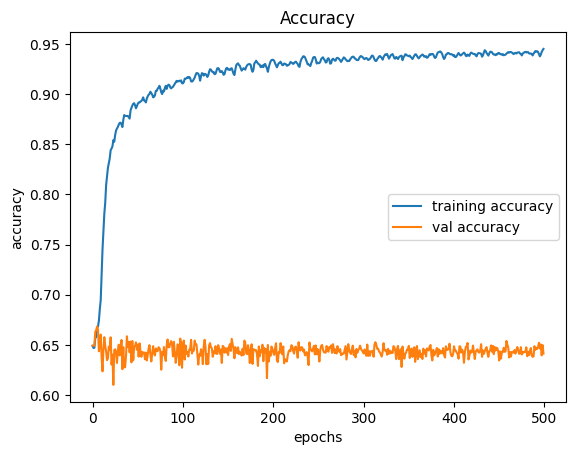

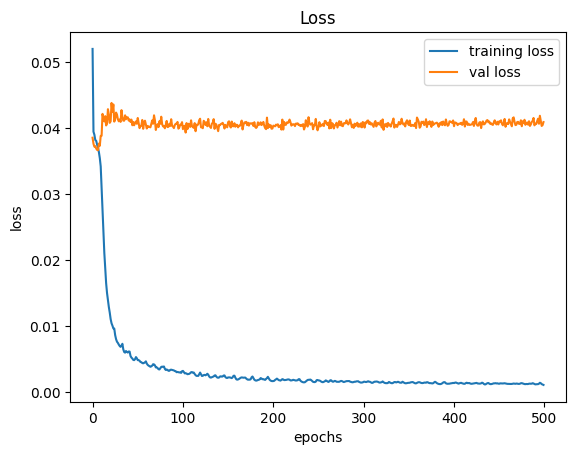

In [ ]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.plot(model.history.history['accuracy'], label='training accuracy')
plt.plot(model.history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(model.history.history['loss'], label='training loss')
plt.plot(model.history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# Create and train a new model instance.
#model = create_model()
model.compile(optimizer='adamax', loss='mse' , metrics=['accuracy'])
model.fit(X, Y, epochs=150)

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.


Epoch 1/150


## Coloring the images

In [ ]:
test_path = '/content/drive/MyDrive/new_data/test/'
import os
import tensorflow as tf
from skimage.transform import resize
test = os.listdir(test_path)
print (test)
colorizer = []
for imgName in test:
  img = tf.keras.utils.img_to_array(tf.keras.utils.load_img('/content/drive/MyDrive/new_data/test/'+imgName)) # importing the test data
  img = resize(img ,(256,256)) # resizing the image to 256*256
  colorizer.append(img)
colorizer = np.array(colorizer, dtype = 'uint8')
colorizer = rgb2lab(1.0/255*colorizer)[:,:,:,0] # storing the grayscale part in colorizer
colorizer = colorizer.reshape(colorizer.shape+(1,))
print(colorizer.shape)

['00000196_(3).jpg', '00000193_(4).jpg', '00000199_(6).jpg', '00000191_(6).jpg', '00000192_(5).jpg', '00000140.jpg', '00000195.jpg', '00000146_(6).jpg', '00000180.jpg', '00000146_(4).jpg', '00000181_(6).jpg', '00000179_(4).jpg', '00000144_(5).jpg', '00000138_(6).jpg', '00000192_(3).jpg', '05test.jfif']
(16, 256, 256, 1)


In [ ]:
output = model.predict(colorizer) # predicting the colors i.e. A and  B channels
output = output * 128

1/1 [==============================] - 2s 2s/step


In [ ]:
# Coloring the images
from skimage.io import imsave
for i in range(len(output)):
    result = np.zeros((256, 256, 3)) # initializing empty array
    result[:,:,0] = colorizer[i][:,:,0] # storing grayscale part in result's zeroth channel
    result[:,:,1:] = output[i] # storing A and B color channel in 1 and 2 channel respectively
    imsave("/content/drive/MyDrive/new_data/results/"+str(i)+".png", lab2rgb(result)) # converting to RGB and saving the image

In [ ]:
import pickle
file=open('model.pickle','wb')
pickle.dump(model,file)
file.close()

In [ ]:
model.save('my_model.h5')